36 36


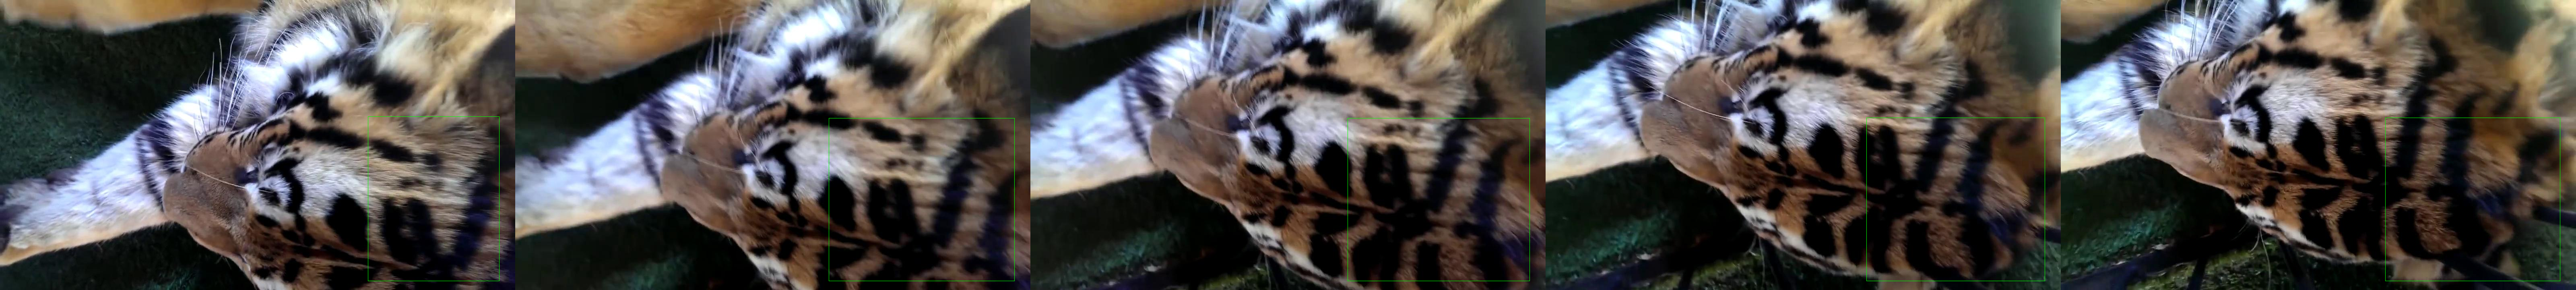

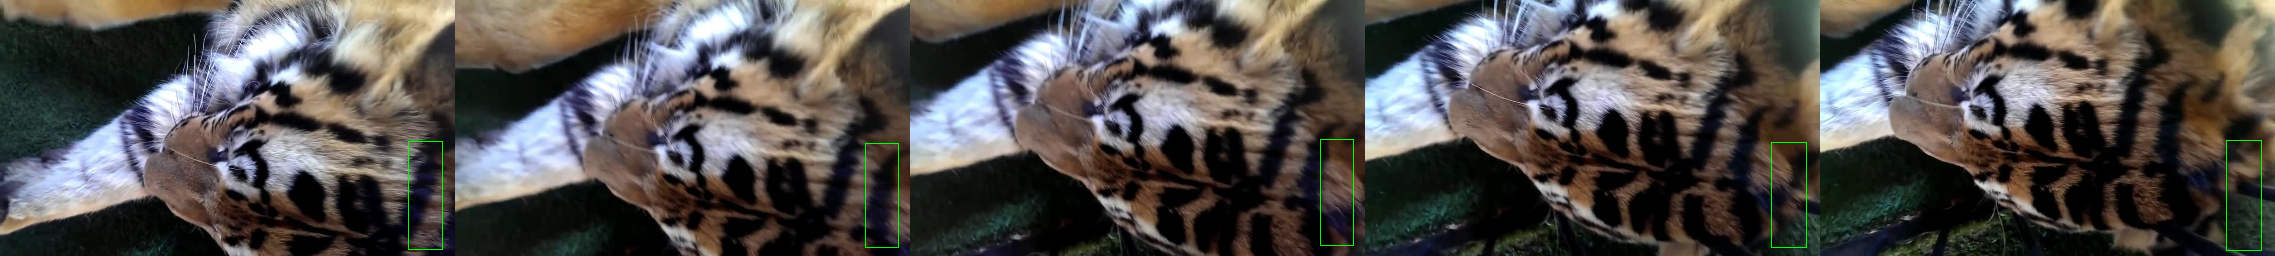

In [181]:
import mmcv
import os
import numpy as np
import random
from PIL import Image
from IPython.display import display, display_markdown

data = mmcv.load('/home/lr/dataset/YouTube-VOS/2018/train/ytvos_flow.json')['train']
data_raft = mmcv.load('/home/lr/dataset/YouTube-VOS/2018/train/ytvos_s256_flow_raft.json')['train']

vid_idx = random.randint(0, len(data) - 2)

vid = data[vid_idx]
base_path = vid['base_path']

vid_raft = None
for v in data_raft:
    if v['base_path'] == base_path:
        vid_raft = v

assert vid_raft != None


root_path = '/home/lr/dataset/YouTube-VOS/2018/train/JPEGImages'
root_path_raft = '/home/lr/dataset/YouTube-VOS/2018/train/JPEGImages_s256'


sample_idx = random.randint(0, len(vid['frame']) - 5)
# sample_idx_raft = random.randint(0, len(vid_raft['frame']) - 5)

print(len(vid['frame']), len(vid_raft['frame']))

def get_bbox(vid, sample_idx, root_path):
    result = []
    for j, frame in enumerate(vid['frame'][sample_idx:]):
        img_path = frame['img_path']
        bbox = np.array([frame['objs'][0]['bbox']])
        img = mmcv.imread(os.path.join(root_path, base_path.split('/')[-1], img_path))
        img = mmcv.bgr2rgb(img)
        out = mmcv.imshow_bboxes(img, bbox, show=False)
        result.append(out)
        if len(result) >= 5:
            break
    return result


result = Image.fromarray(np.concatenate(get_bbox(vid, sample_idx, root_path), 1))
display(result)

result_raft = Image.fromarray(np.concatenate(get_bbox(vid_raft, sample_idx, root_path_raft), 1))
display(result_raft)




